In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


labels_df = pd.read_csv("development.csv")

#Load the data
data = np.load("development.npy")

unique_speakers = labels_df['speaker_id'].unique()

np.random.seed(42)
train_speakers, val_speakers = train_test_split(unique_speakers, test_size=0.3, random_state=42)

train_data = labels_df[labels_df['speaker_id'].isin(train_speakers)]
val_data = labels_df[labels_df['speaker_id'].isin(val_speakers)]


train_id = train_data["id"].values
train_set = data[train_id]

val_id = val_data["id"].values
validation_set = data[val_id]

In [35]:
#MELSPCET
train = train_set[:, 12:75,:]
validation = validation_set[:, 12:75, :]

#MFCC d
#train = train_set[:, 108:139,:]
#validation = validation_set[:, 108:139, :]

#MFCC d2
#train = train_set[:, 140:171,:]
#validation = validation_set[:, 140:171, :]

In [36]:
y_train = train_data["word"]
y_validation = val_data["word"]

In [37]:
#Reshape Training set
n_samples = train.shape[0]
n_features = train.shape[1] * train.shape[2]  # 63 * 44
X_train = train.reshape(n_samples, n_features)

# Reshape Validation Set
n_samples = validation.shape[0]
n_features = validation.shape[1] * validation.shape[2]  # 63 * 44
X_test = validation.reshape(n_samples, n_features)

In [58]:
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune n_neighbors
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [59]:
# Print evaluation metrics
y_pred = knn.predict(X_test)
print(classification_report(y_validation, y_pred))
print('Accuracy:', accuracy_score(y_validation, y_pred))


              precision    recall  f1-score   support

       Alarm       0.73      0.77      0.75       622
    Brötchen       0.79      0.78      0.78       622
   Fernseher       0.79      0.82      0.80       624
        Haus       0.71      0.82      0.76       624
     Heizung       0.78      0.75      0.77       620
     Leitung       0.77      0.70      0.73       623
       Licht       0.69      0.57      0.62       624
     Lüftung       0.84      0.82      0.83       623
        Ofen       0.59      0.66      0.62       624
       Radio       0.80      0.73      0.76       624
    Schraube       0.97      0.92      0.94       623
     Spiegel       0.97      0.89      0.93       624
 Staubsauger       0.97      0.88      0.92       620
          an       0.70      0.73      0.71       624
         aus       0.82      0.67      0.74       623
        kann       0.75      0.76      0.76       621
       nicht       0.64      0.72      0.68       624
       offen       0.62    

In [40]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Setup GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [41]:
# Print evaluation metrics
print(classification_report(y_validation, y_pred))
print('Accuracy:', accuracy_score(y_validation, y_pred))


              precision    recall  f1-score   support

       Alarm       0.79      0.76      0.78       622
    Brötchen       0.85      0.75      0.80       622
   Fernseher       0.84      0.82      0.83       624
        Haus       0.72      0.81      0.76       624
     Heizung       0.81      0.76      0.78       620
     Leitung       0.79      0.72      0.75       623
       Licht       0.70      0.56      0.62       624
     Lüftung       0.84      0.82      0.83       623
        Ofen       0.60      0.66      0.63       624
       Radio       0.80      0.72      0.76       624
    Schraube       0.96      0.92      0.94       623
     Spiegel       0.96      0.91      0.93       624
 Staubsauger       0.96      0.89      0.93       620
          an       0.70      0.73      0.72       624
         aus       0.81      0.68      0.74       623
        kann       0.72      0.77      0.75       621
       nicht       0.63      0.73      0.67       624
       offen       0.60    

In [51]:
cv_results = pd.DataFrame(grid_search.cv_results_)

In [52]:
print(cv_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0       70.860441     13.390415        98.128294        8.301382    euclidean   
1       70.528403     18.137724        98.111857       17.157407    euclidean   
2       28.744439     33.496632       100.241653       10.545967    euclidean   
3        2.002339      0.222832       105.394575       11.414747    euclidean   
4        2.423326      0.315453       113.315862        7.805336    euclidean   
5        1.795943      0.235135        99.252027        9.731455    euclidean   
6        2.259883      0.418275       107.525732        7.854568    euclidean   
7        1.991225      0.464316       109.985870        8.135566    euclidean   
8        1.969737      0.289209       117.965154       10.569388    euclidean   
9        1.732095      0.115138       116.786935        7.386138    euclidean   
10       1.976750      0.291103      1463.598640       65.634784    manhattan   
11       2.614965      0.365

C:\Users\oztur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oztur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


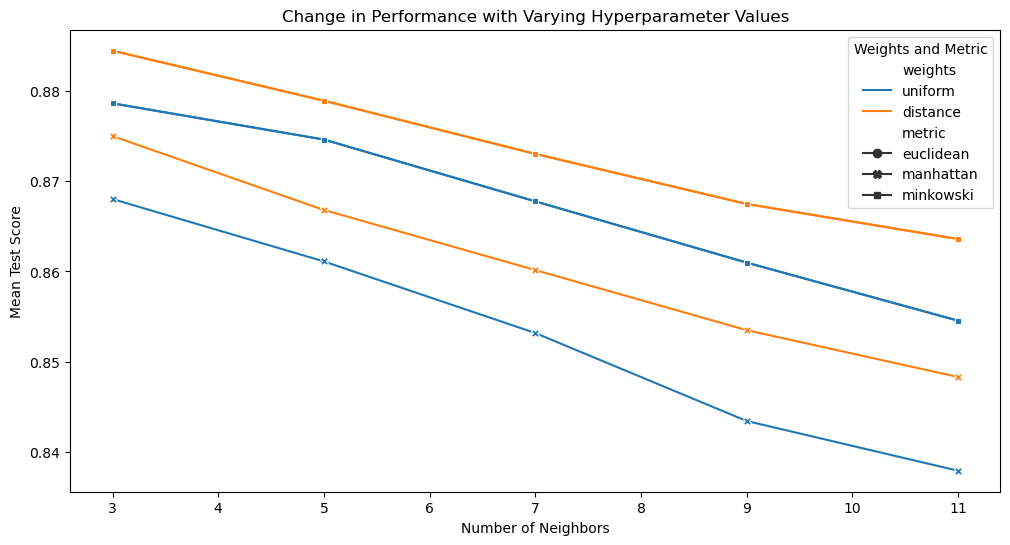

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the grid search results
results = grid_search.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

# Create a DataFrame to store the results
results_df = pd.DataFrame(params)
results_df['mean_test_score'] = mean_test_scores

# Plot the change in performance with varying hyperparameter values
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='n_neighbors', y='mean_test_score', hue='weights', style='metric', markers=True, dashes=False)
plt.title('Change in Performance with Varying Hyperparameter Values')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.legend(title='Weights and Metric')
plt.show()

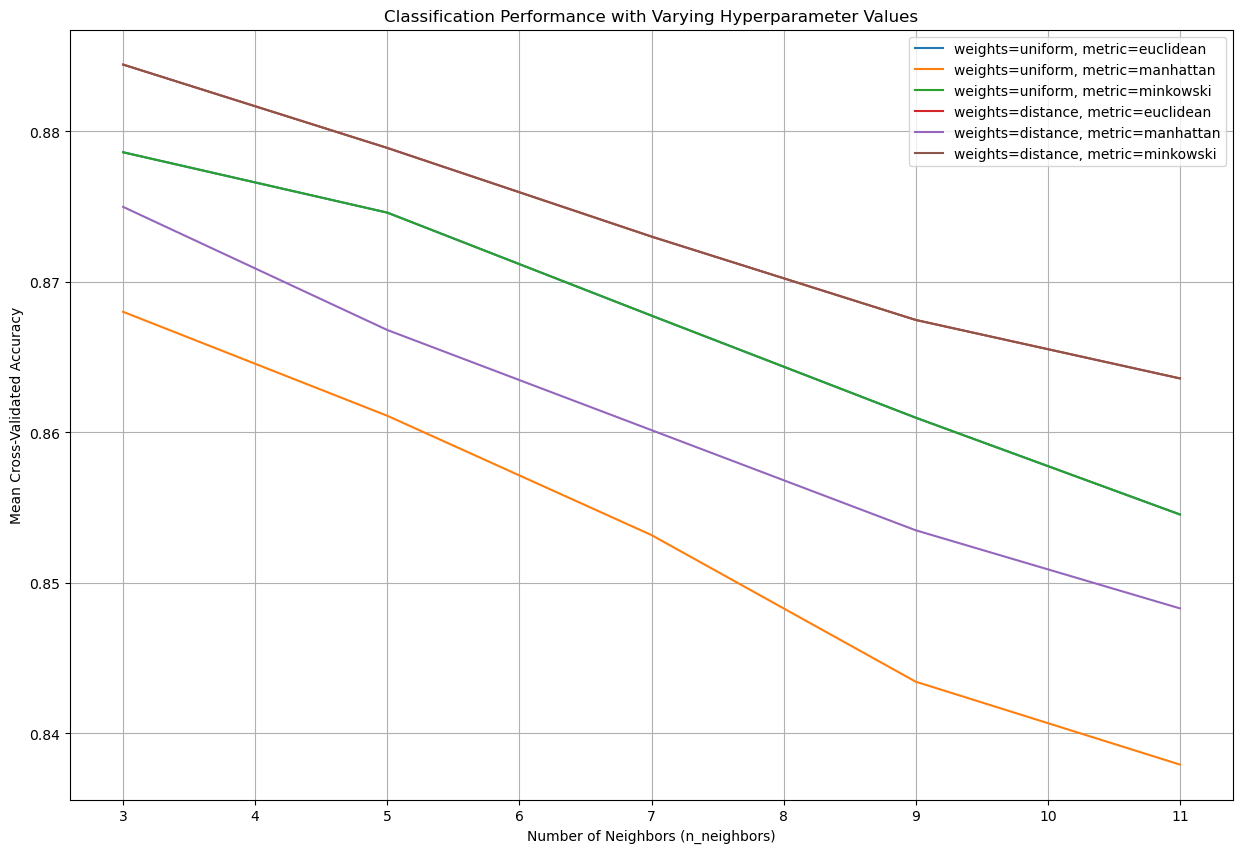

In [64]:

# Extract the results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Plotting accuracy against the number of neighbors for each combination of weights and metric
plt.figure(figsize=(15, 10))
for weight in param_grid['weights']:
    for metric in param_grid['metric']:
        subset = results[(results['param_weights'] == weight) & (results['param_metric'] == metric)]
        plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], label=f'weights={weight}, metric={metric}')

plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Classification Performance with Varying Hyperparameter Values')
plt.legend()
plt.grid(True)
plt.show()


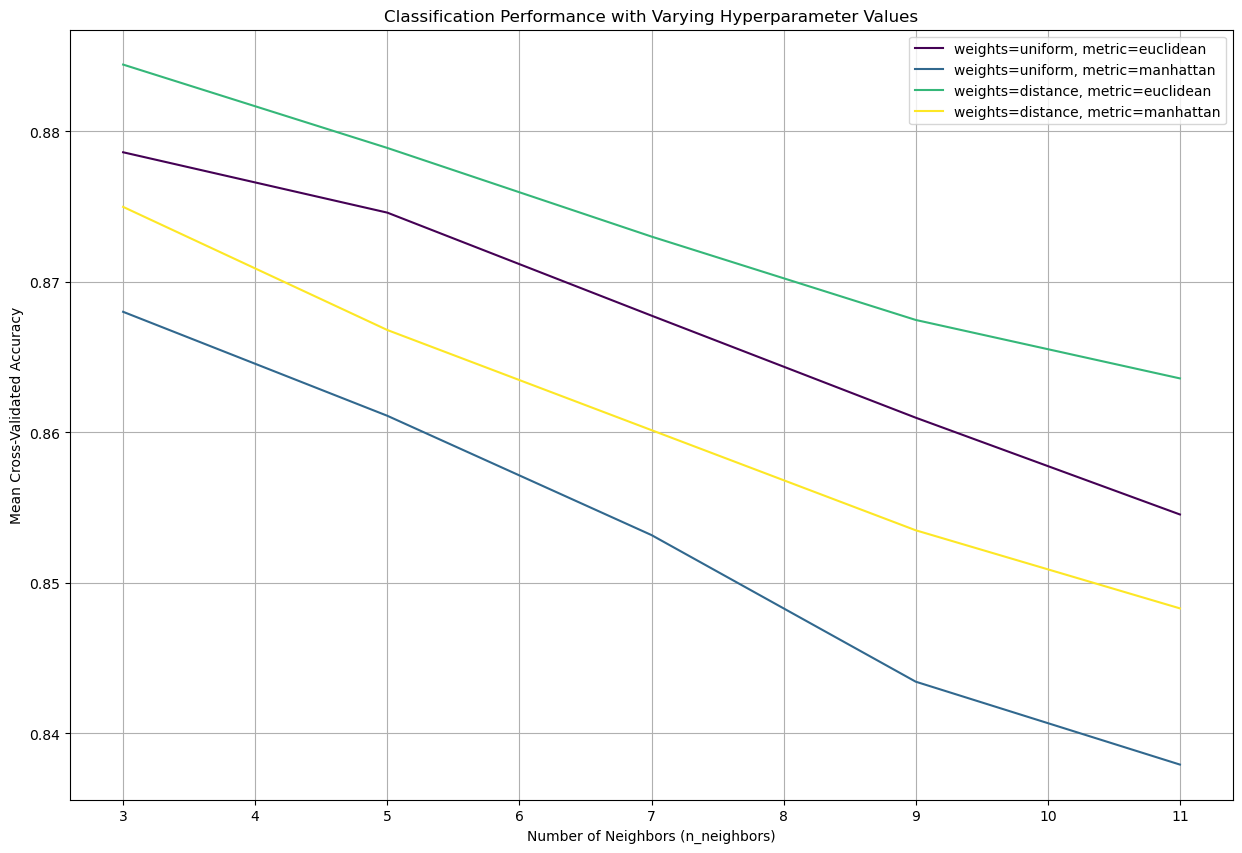

In [61]:


# Assuming param_grid is defined somewhere in your code
param_grid = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'n_neighbors': np.arange(1, 31)
}

# Extract the results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Generate a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(param_grid['weights']) * len(param_grid['metric'])))

plt.figure(figsize=(15, 10))
color_idx = 0

for weight in param_grid['weights']:
    for metric in param_grid['metric']:
        subset = results[(results['param_weights'] == weight) & (results['param_metric'] == metric)]
        plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], label=f'weights={weight}, metric={metric}', color=colors[color_idx])
        color_idx += 1

plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Classification Performance with Varying Hyperparameter Values')
plt.legend()
plt.grid(True)
plt.show()

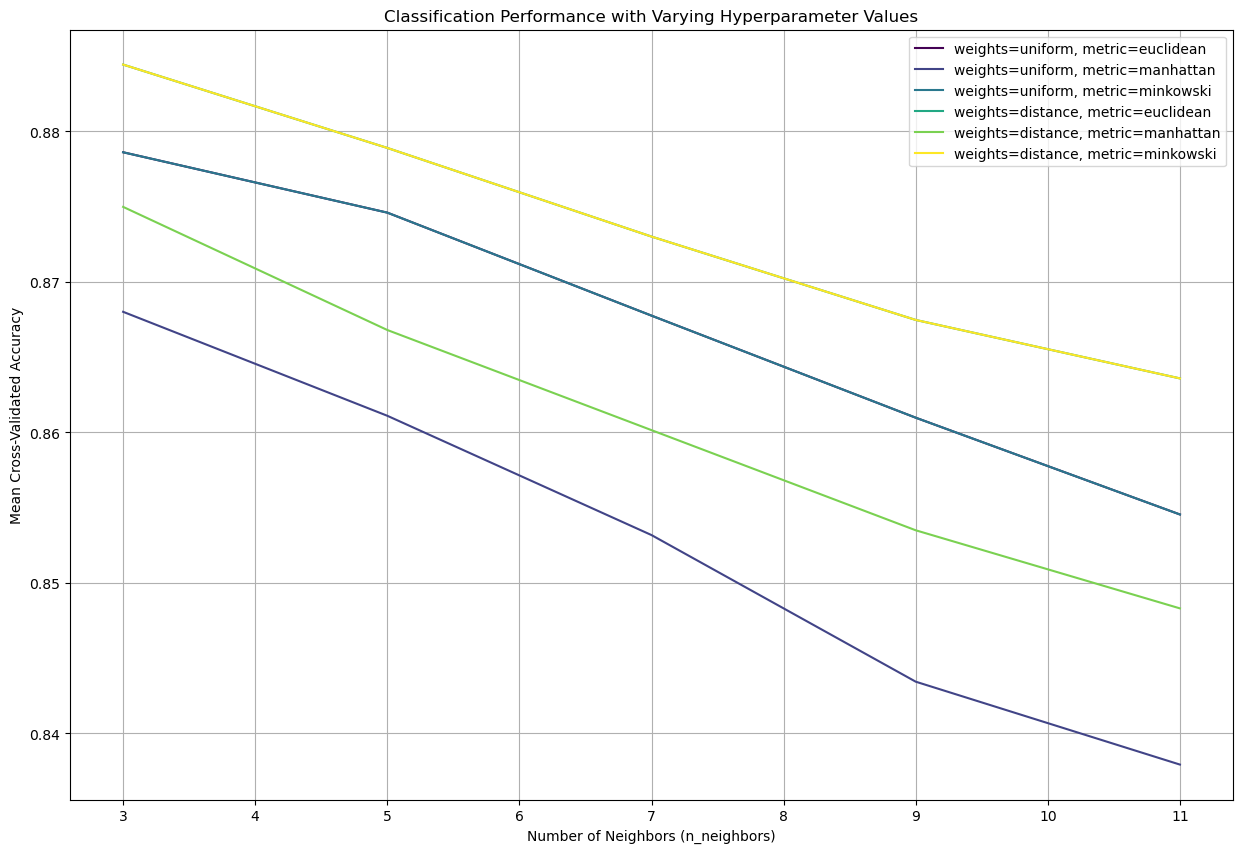

In [62]:

# Assuming param_grid is defined somewhere in your code
param_grid = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'n_neighbors': np.arange(1, 31)
}

# Extract the results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Generate a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(param_grid['weights']) * len(param_grid['metric'])))

plt.figure(figsize=(15, 10))
color_idx = 0

for weight in param_grid['weights']:
    for metric in param_grid['metric']:
        subset = results[(results['param_weights'] == weight) & (results['param_metric'] == metric)]
        plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], label=f'weights={weight}, metric={metric}', color=colors[color_idx])
        color_idx += 1

plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Classification Performance with Varying Hyperparameter Values')
plt.legend()
plt.grid(True)
plt.show()

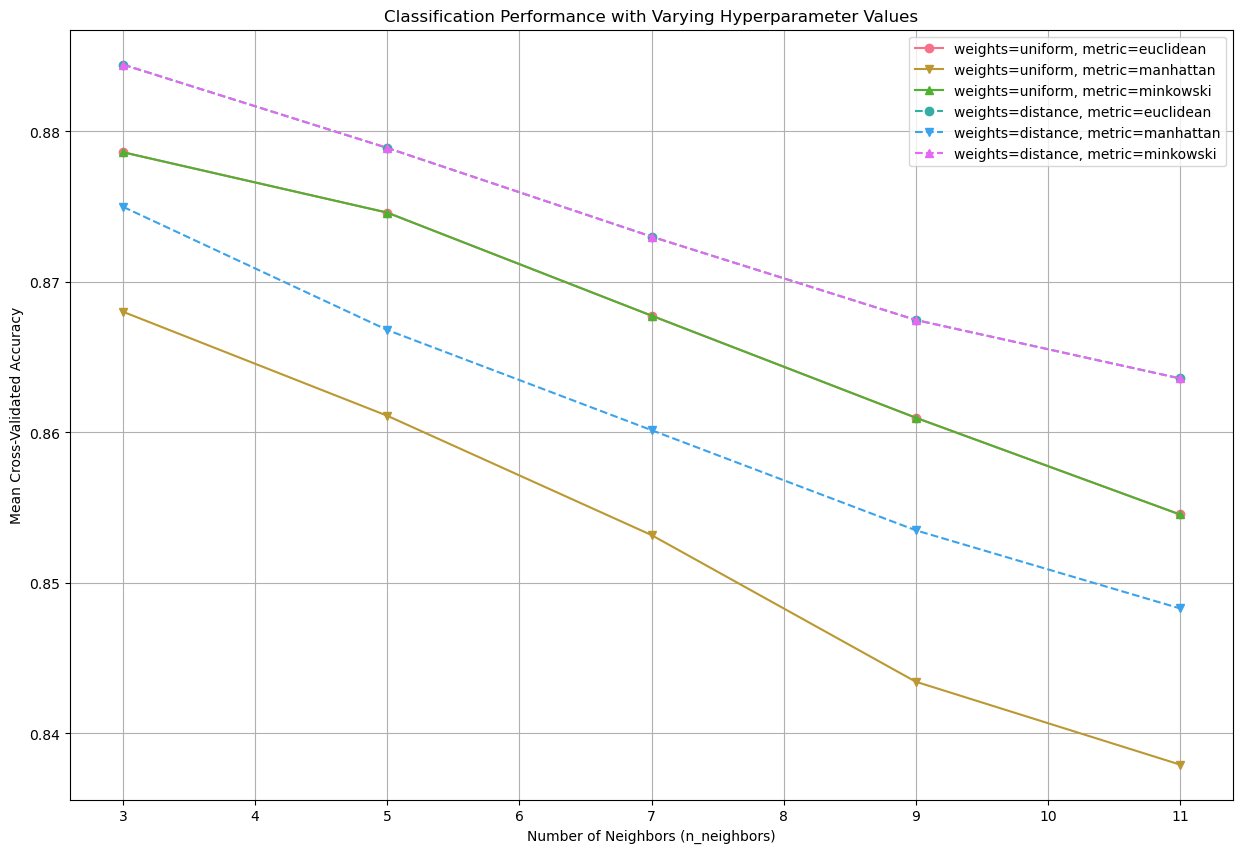

In [65]:

# Extract the results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Define a custom color palette
colors = sns.color_palette("husl", len(param_grid['weights']) * len(param_grid['metric']))

# Plotting accuracy against the number of neighbors for each combination of weights and metric
plt.figure(figsize=(15, 10))

# Use different line styles and markers
line_styles = ['-', '--', '-.', ':']
markers = ['o', 'v', '^', '<', '>']

# Check for each combination and plot if present
color_idx = 0
for i, weight in enumerate(param_grid['weights']):
    for j, metric in enumerate(param_grid['metric']):
        subset = results[(results['param_weights'] == weight) & (results['param_metric'] == metric)]
        if not subset.empty:
            plt.plot(subset['param_n_neighbors'], subset['mean_test_score'],
                     label=f'weights={weight}, metric={metric}',
                     color=colors[color_idx],
                     linestyle=line_styles[i % len(line_styles)],
                     marker=markers[j % len(markers)])
            color_idx += 1

plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Classification Performance with Varying Hyperparameter Values')
plt.legend()
plt.grid(True)
plt.show()
